In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Load climate variables for specified area and model run

In [ ]:
# Define dataset specifics

model_scenario_name = 'MPI-ESM1-2-LR_ssp245' # Choose a model and SSP scenario
area_name = 'global' # Choose an area
data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'NorESM2-LM_ssp126':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    middle_time = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'NorESM2-LM_ssp245':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    middle_time = '2025-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp126':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    middle_time = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    middle_time = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2015-01-01'; end_time = '2059-12-31'
    middle_time = '2040-01-01'
    time_array = np.arange(2015, 2060, 1)
elif model_scenario_name == 'UKESM1-0-LL_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MPI-ESM1-2-LR_ssp245':
    start_time = '2015-01-01'; end_time = '2059-12-31'
    cooling_year = '2040-01-01'
    time_array = np.arange(2015, 2060, 1)
elif model_scenario_name == 'GFDL-ESM4_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360
else:
    print("This area is not predefined in the current study, but can be added to the analysis")
 

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)

temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))

temp.load()

<xarray.DataArray 'tas' (time: 16436, lat: 96, lon: 192)> Size: 1GB
array([[[241.09274, 241.04977, 241.08688, ..., 241.05759, 240.86813,
         241.06345],
        [241.14548, 240.999  , 240.91696, ..., 241.49313, 241.36618,
         241.23141],
        [244.999  , 244.86813, 244.72946, ..., 245.61032, 245.4072 ,
         245.24509],
        ...,
        [252.2529 , 251.5615 , 250.92673, ..., 254.30759, 253.62595,
         252.94235],
        [251.53024, 251.06345, 250.62985, ..., 252.97946, 252.47556,
         252.01657],
        [251.05563, 250.95993, 250.83884, ..., 251.43259, 251.30759,
         251.17087]],

       [[241.60019, 241.56503, 241.55722, ..., 241.68027, 240.93808,
         241.66855],
        [241.65097, 241.47324, 241.36386, ..., 242.0748 , 241.92245,
         241.77206],
        [245.42636, 245.33652, 244.49277, ..., 247.22128, 246.94394,
         246.40488],
...
        [250.92789, 250.92789, 250.95718, ..., 250.77164, 250.80484,
         250.91031],
        [249.14664, 249.24039, 249.13492, ..., 249.24039, 249.215  ,
         249.24625],
        [250.43375, 250.4318 , 250.42789, ..., 250.45718, 250.44742,
         250.4396 ]],

       [[243.90102, 243.88539, 243.84828, ..., 243.99477, 243.96742,
         243.93422],
        [245.69008, 245.64906, 245.56313, ..., 245.8893 , 245.79555,
         245.70766],
        [246.66469, 246.6061 , 246.60805, ..., 246.84047, 246.74672,
         246.68422],
        ...,
        [247.53773, 247.5475 , 247.55922, ..., 247.46938, 247.45961,
         247.52211],
        [247.46352, 247.41664, 247.4186 , ..., 247.53188, 247.42836,
         247.45961],
        [249.32094, 249.28969, 249.2643 , ..., 249.41469, 249.37563,
         249.34828]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 131kB 2015-01-01T12:00:00 ... 2059-12-31T1...
  * lat      (lat) float64 768B -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-05T12:32:19Z altered by CMOR: Treated scalar dime...

## Plot timeseries for specific grid point

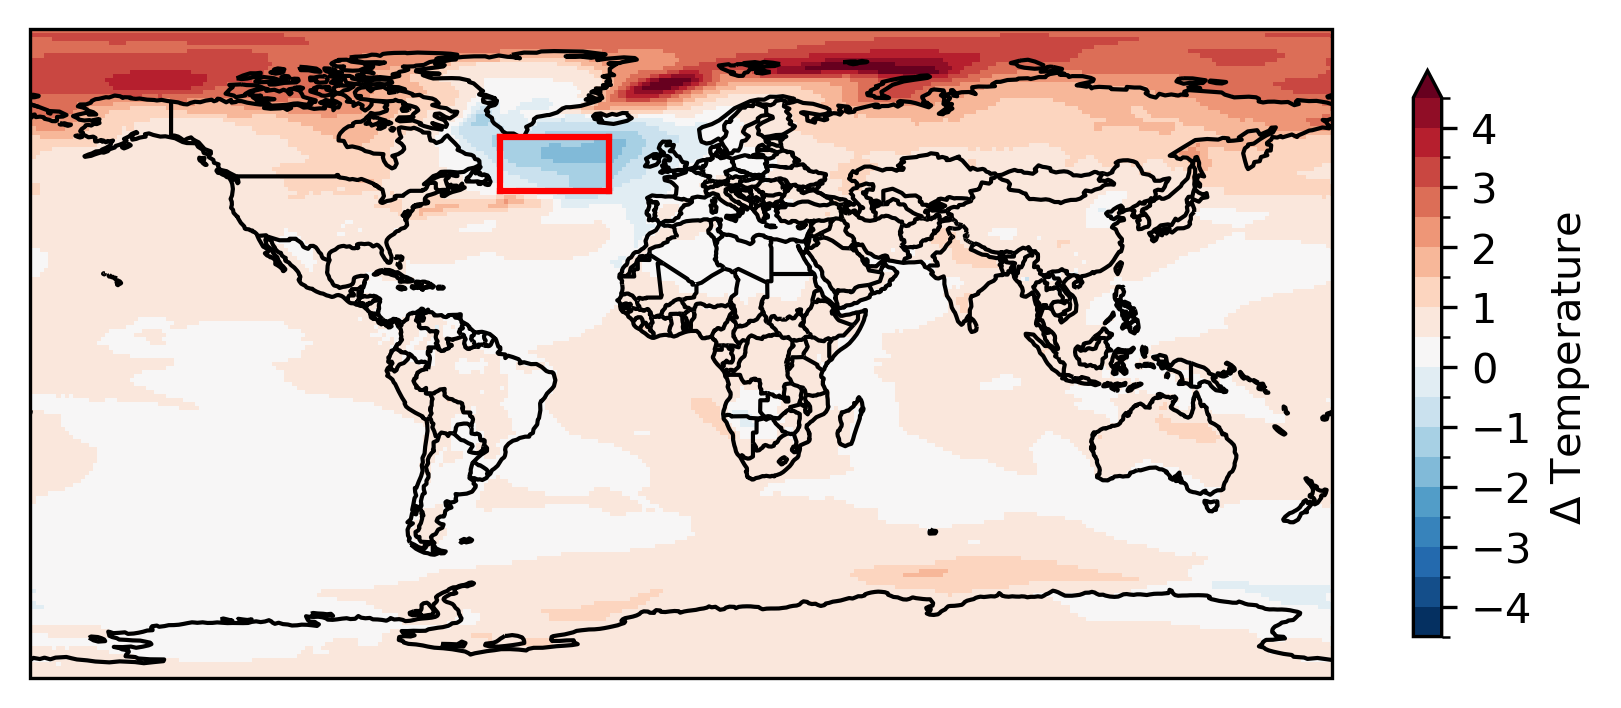

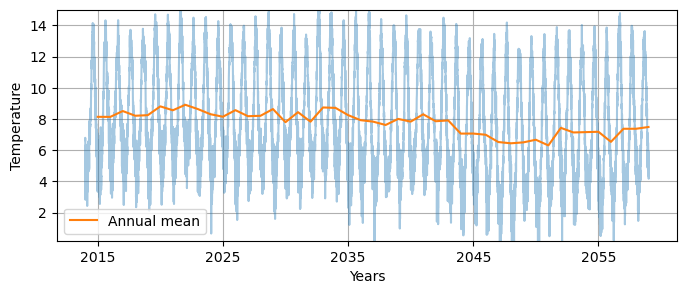

In [9]:
save_folder = '../figures/time_series/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

# Choose grid point

southern_lat = 45; northern_lat = 60
western_lon = 310; eastern_lon = 340
SPG_area = temp.sel(lat=slice(southern_lat, northern_lat),lon=slice(western_lon, eastern_lon)).mean(['lat', 'lon'])

cooling_year = '2040-01-01'
# Plot map of grid point

fig = plt.figure(1, figsize=(7,7),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
data = temp.sel(time=slice(cooling_year, end_time)).mean('time') - temp.sel(time=slice(start_time, cooling_year)).mean('time')

map = data.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=np.linspace(-4.5,4.5,19), 
                cbar_kwargs={'orientation':'vertical','shrink':0.35, 'aspect':20,'label':'$\Delta$ Temperature'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
#ax.scatter(lon,lat, s=20, c='r', marker='o', linewidths=1, transform=ccrs.PlateCarree())
ax.plot([western_lon, eastern_lon],[southern_lat, southern_lat], color='red',transform=ccrs.PlateCarree())
ax.plot([western_lon, eastern_lon],[northern_lat, northern_lat], color='red',transform=ccrs.PlateCarree())
ax.plot([western_lon, western_lon],[southern_lat, northern_lat], color='red',transform=ccrs.PlateCarree())
ax.plot([eastern_lon, eastern_lon],[southern_lat, northern_lat], color='red',transform=ccrs.PlateCarree())
ax.set_title('')
plt.show()

# Plot time series of temperature in point

plt.figure(figsize=[8,3])
plt.plot(np.arange(0, len(SPG_area.time)), SPG_area-273.15, alpha=0.4)
ann_avg = SPG_area.groupby('time.year').mean('time')
plt.plot(np.arange(1, len(ann_avg.year)+1)*365, ann_avg-273.15, label='Annual mean')
plt.xticks(np.arange(365, len(SPG_area.time), 3650), np.arange(2015,2060,10))
plt.xlabel('Years')
#plt.ylabel("Annual mean temperature, lat="+str(lat)+", lon="+str(lon))
plt.grid()
plt.legend()
plt.ylim([0.2,15])
plt.ylabel('Temperature')
plt.show()